# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [118]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip ('/content/drive/MyDrive/TT5/archive (4).zip')

/bin/bash: -c: line 1: syntax error near unexpected token `'/content/drive/MyDrive/TT5/archive (4).zip''
/bin/bash: -c: line 1: `unzip ('/content/drive/MyDrive/TT5/archive (4).zip')'


In [14]:
df=pd.read_csv('/content/drive/MyDrive/TT5/archive (4).zip')

In [111]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [112]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [113]:
from sklearn.model_selection import train_test_split




In [16]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [109]:
df.shape

(19966, 6)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [19]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048396,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


In [20]:
df.sample()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
5462,3584.0,274.3,0.0,0.0,5,Clear,sky is clear,2018-03-29 21:00:00


In [21]:
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00
19999,5042.0,301.65,0.0,0.0,40,Clouds,scattered clouds,2018-05-31 18:00:00


In [22]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [23]:
df.duplicated().sum()

12

<Axes: >

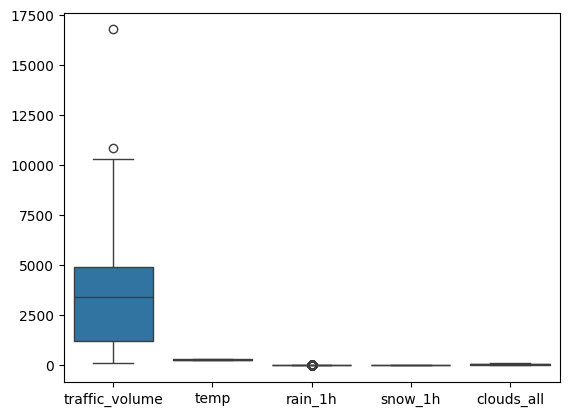

In [24]:
sns.boxplot(df)

In [35]:
def remove_outlier(df,coulmn):
    Q1=df[coulmn].quantile(0.25)
    Q3=df[coulmn].quantile(0.75)
    IQR= Q3-Q1
    lower_bound=Q1 - 1.5 *IQR
    upper_bound=Q3 + 1.5 *IQR
    return df[(df[coulmn]>=lower_bound) & (df[coulmn]<=upper_bound)]

In [36]:
df=remove_outlier(df,'traffic_volume')



<Axes: xlabel='temp', ylabel='Count'>

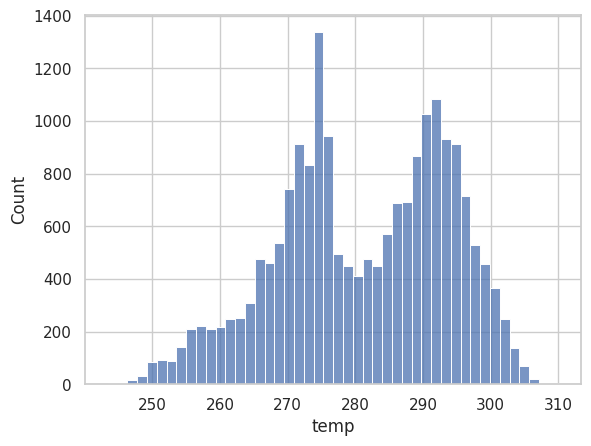

In [51]:
sns.histplot(df['temp'])

In [93]:
df['weather_main'].value_counts()

,count
weather_main,
0,5600
1,5228
5,2754
6,2240
8,1460
2,990
4,672
9,541
3,478


In [114]:
df = df.sort_index()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [52]:
df.isna().sum()

,0
traffic_volume,1
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [73]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [74]:
# Initialize LabelEncoder
le = LabelEncoder()

# Label encode 'weather_main' column
df['weather_main'] = le.fit_transform(df['weather_main'])

# Label encode 'weather_description' column
df['weather_description'] = le.fit_transform(df['weather_description'])


In [94]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,NaN,291.15,0.0,0.0,90.0,5,16,2017-08-27 01:00:00
1,1209.0,286.01,0.0,0.0,1.0,0,25,2018-09-06 23:00:00
2,1248.0,293.69,0.0,0.0,75.0,1,1,2017-08-25 18:00:00
3,4602.0,262.35,0.0,0.0,1.0,0,25,2017-11-09 22:00:00
4,2838.0,267.08,0.0,0.0,5.0,0,25,2017-11-09 15:00:00


In [44]:

df['traffic_volume'] = df['traffic_volume'].transform(lambda x: x.fillna(x.mean()))

<ipython-input-44-2c6e8ccf9ef4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_volume'] = df['traffic_volume'].transform(lambda x: x.fillna(x.mean()))


,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,NaN,291.15,0.0,0.0,90.0,5,16,2017-08-27 01:00:00
1,1209.0,286.01,0.0,0.0,1.0,0,25,2018-09-06 23:00:00
2,1248.0,293.69,0.0,0.0,75.0,1,1,2017-08-25 18:00:00
3,4602.0,262.35,0.0,0.0,1.0,0,25,2017-11-09 22:00:00
4,2838.0,267.08,0.0,0.0,5.0,0,25,2017-11-09 15:00:00


<Axes: >

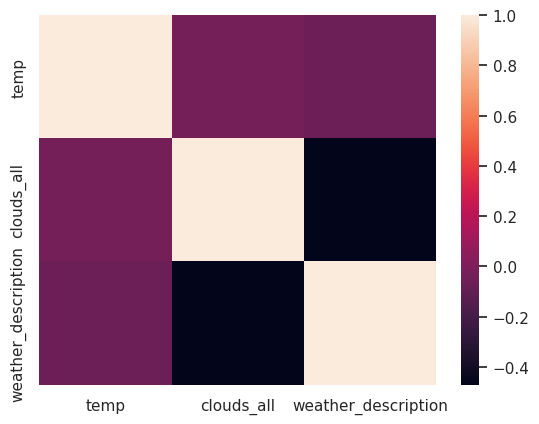

In [95]:
corr_matrix=df[['temp','clouds_all','weather_description']].corr()
sns.heatmap(corr_matrix)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [45]:
df['traffic_volume'] = df['traffic_volume'].shift(1)


<ipython-input-45-96a8a22a8f69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_volume'] = df['traffic_volume'].shift(1)


In [50]:
df['traffic_volume']

,traffic_volume
0,NaN
1,1209.0
2,1248.0
3,4602.0
4,2838.0
...,...
19995,6601.0
19996,2723.0
19997,5895.0
19998,1132.0


In [98]:
#df = df.drop(columns=['weather_description'])
df = df.drop(columns=['weather_description']) حذفتهم بالغلط


In [100]:
#df = df.drop(columns=['date_time'])
df = df.drop(columns=['date_time'])


In [99]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time
0,NaN,291.15,0.0,0.0,90.0,5,2017-08-27 01:00:00
1,1209.0,286.01,0.0,0.0,1.0,0,2018-09-06 23:00:00
2,1248.0,293.69,0.0,0.0,75.0,1,2017-08-25 18:00:00
3,4602.0,262.35,0.0,0.0,1.0,0,2017-11-09 22:00:00
4,2838.0,267.08,0.0,0.0,5.0,0,2017-11-09 15:00:00


In [101]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main
0,NaN,291.15,0.0,0.0,90.0,5
1,1209.0,286.01,0.0,0.0,1.0,0
2,1248.0,293.69,0.0,0.0,75.0,1
3,4602.0,262.35,0.0,0.0,1.0,0
4,2838.0,267.08,0.0,0.0,5.0,0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19966 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   traffic_volume  19965 non-null  float64
 1   temp            19966 non-null  float64
 2   rain_1h         19966 non-null  float64
 3   snow_1h         19966 non-null  float64
 4   clouds_all      19966 non-null  float64
 5   weather_main    19966 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.6 MB


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [116]:
X = df.drop(['temp'], axis=1)

y = df['temp']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [54]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [ ]:
seq_length = 60  # Using 60 days of data to predict the next day

# Create the sequences
X, y = create_sequences(scaled_data, seq_length)

# Reshape the data for the GRU model
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [102]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Build the GRU model
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: could not convert string to float: 'Snow'

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [104]:
predicted_stock_price = model.predict(X_test)

# Inverse transform to get actual stock prices
predicted_stock_price = predicted_stock_price.reshape(-1, 8)
y_test = y_test.reshape(-1, 8)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

ValueError: could not convert string to float: 'Clouds'

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [89]:
model= Sequential()
model.add(LSTM(16,return_sequences=True,input_shape=(X_train.shape[1],1))) #train_X.shape[1] , train_X.shape[2] عدد الفيوتشر

model.add(LSTM(32,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [110]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


NameError: name 'trainX' is not defined

In [90]:
model.fit(X_train, y_train,epochs=10,batch_size=32)

ValueError: could not convert string to float: 'Snow'

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

1-I chose normalization and missing values because I have missing values in the data and I have to fill in or delete them I filled them in and I used max,min to round the values to zero and one, I also deleted outliers and used label encoder to convert any categorial feature to number

2-No, I'm not use feature engineering

I chose the GRU model for our time-series forecasting due to its efficiency and ability to handle large datasets effectively. Unlike LSTMs, GRUs have a simpler architecture with fewer parameters, which reduces computational cost and training time. This makes them particularly suitable for large datasets, as they can process and learn from extensive sequences without compromising performance. Additionally, GRUs still manage long-term dependencies well, ensuring that we capture the relevant patterns in the data without overfitting.”